<a href="https://colab.research.google.com/github/Rogerio-mack/VLF/blob/main/VLF_Availability_Panels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
#@markdown
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [97]:
import os

path_in = '/content/drive/Shareddrives/NarrowbandFull_2011/' 

all_files = os.listdir(path_in)

all_files[0:10]


['SouthPole',
 'Adelaide',
 'Yakutat',
 'Walsenburg',
 'Algeria',
 'Valdez',
 'Uzbekistan',
 'Arecibo',
 'Argentina',
 'Taylor']

In [98]:
from datetime import date, timedelta

d1 = date(2011,1,1)
d2 = date(2011,12,31)

# this will give you a list containing all of the dates
all_days = [str( d1 + timedelta(days=x) ) for x in range((d2-d1).days + 1)]

all_days[0:10]

['2011-01-01',
 '2011-01-02',
 '2011-01-03',
 '2011-01-04',
 '2011-01-05',
 '2011-01-06',
 '2011-01-07',
 '2011-01-08',
 '2011-01-09',
 '2011-01-10']

In [99]:
panel_band = {}
for entry in all_files:
  panel_band[entry] = {}
  for d in all_days: 
    if os.path.exists(path_in + entry + '/' + d.replace('-','_') + '/' ):
      panel_band[entry][d] = 1 # len(os.listdir(path_in + entry + '/' + d.replace('-','_') + '/' ))
    else:
      panel_band[entry][d] = 0

# panel_band['SouthPole']

In [100]:
import pandas as pd

panel_band_df = pd.DataFrame(panel_band)

display(panel_band_df.head())

,SouthPole,Adelaide,Yakutat,Walsenburg,Algeria,Valdez,Uzbekistan,Arecibo,Argentina,Taylor,...,Cyprus,Ketchikan,Juneau,Ecuador,France,Japan,Greece,Ireland,Hermon,KeyWest
2011-01-01,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2011-01-02,0,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,1,0,1,0
2011-01-03,0,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,1,0,1,0
2011-01-04,0,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,1,0,1,0
2011-01-05,0,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,1,0,1,0


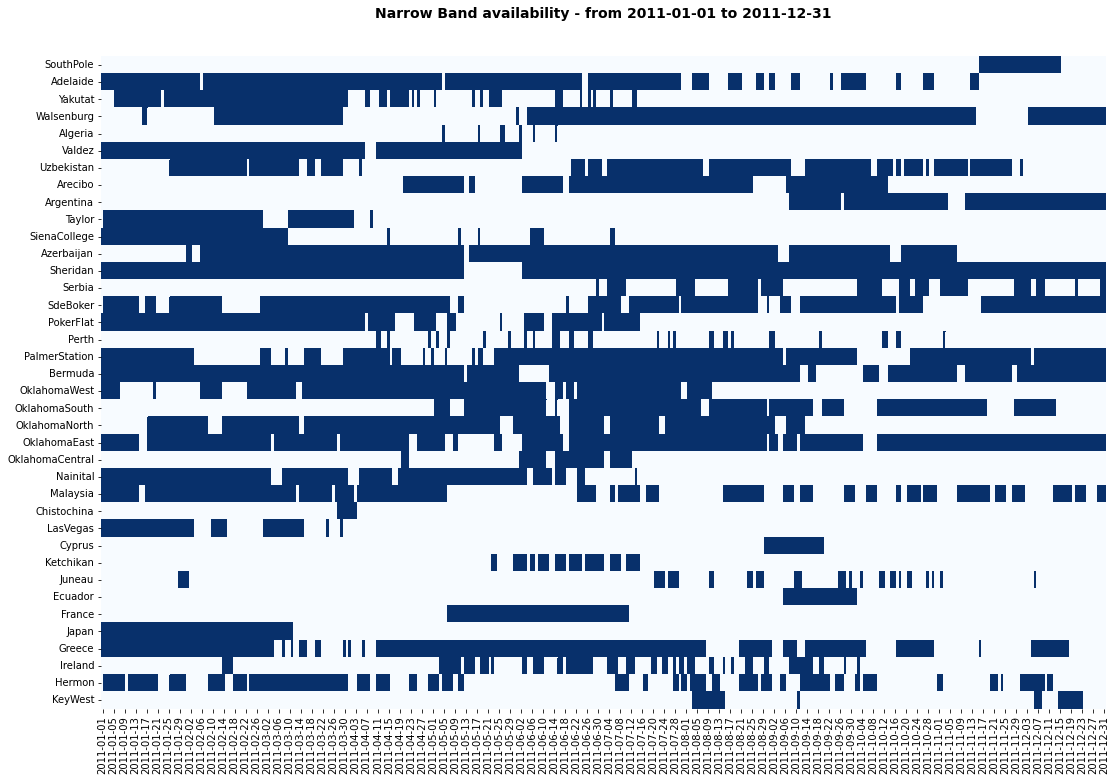

In [101]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

plt.figure(figsize=(18,12))
sns.heatmap(panel_band_df.T,cbar=False,cmap='Blues')
plt.title('Narrow Band availability - from ' + panel_band_df.index.min() + ' to ' + panel_band_df.index.max() + '\n\n',fontsize=14,weight='bold')
plt.show()

In [102]:
entry = 'Adelaide'

all_sources = set()

for d in all_days: 
  if os.path.exists(path_in + entry + '/' + d.replace('-','_') + '/' ):
    d_files = os.listdir(path_in + entry + '/' + d.replace('-','_') + '/' )
    this_sources = set([x.split('_')[0][-3:] for x in d_files])
    all_sources = set.union(all_sources, this_sources)


In [103]:
all_sources

{'JJI', 'NLK', 'NPM', 'NST', 'NWC', 'RA1', 'RA2', 'RA3', 'SPH', 'VTX'}

In [104]:
panel_entry_band = {}

for source in all_sources:
  panel_entry_band[source] = {}
  
for d in all_days: 
  if os.path.exists(path_in + entry + '/' + d.replace('-','_') + '/' ):
    
    d_files = os.listdir(path_in + entry + '/' + d.replace('-','_') + '/' )

    this_sources = set([x.split('_')[0][-3:] for x in d_files])

    for source in this_sources:
      panel_entry_band[source][d] = 1

    for source in all_sources.difference(this_sources):
      panel_entry_band[source][d] = 0
  
  else:
    for source in all_sources:
      panel_entry_band[source][d] = 0



In [105]:
panel_entry_band_df = pd.DataFrame(panel_entry_band)

display(panel_entry_band_df.head())



,VTX,NST,JJI,RA2,RA3,NPM,SPH,NWC,RA1,NLK
2011-01-01,1,1,1,0,0,1,1,1,0,1
2011-01-02,1,1,1,0,0,1,1,1,0,1
2011-01-03,1,1,1,0,0,1,1,1,0,1
2011-01-04,1,1,1,0,0,1,1,1,0,1
2011-01-05,1,1,1,0,0,1,1,1,0,1


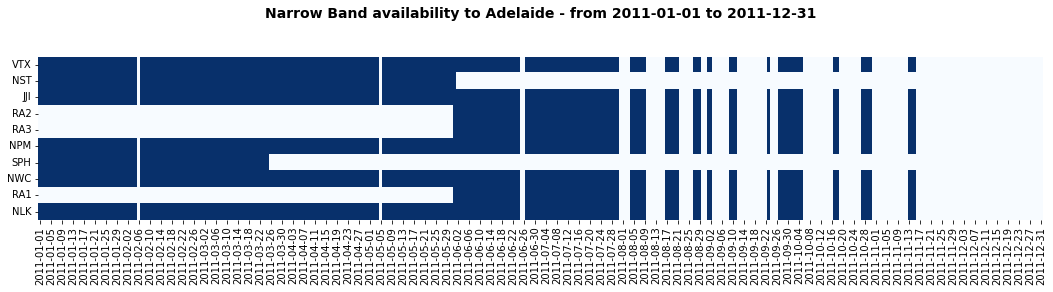

In [106]:
plt.figure(figsize=(18,12/40*len(all_sources)))
sns.heatmap(panel_entry_band_df.T,cbar=False,cmap='Blues')
plt.title('Narrow Band availability to ' + entry + ' - from ' + panel_band_df.index.min() + ' to ' + panel_band_df.index.max() + '\n\n',fontsize=14,weight='bold')
plt.show()